In [1]:
import os
os.chdir('/Users/rahulsharma/Downloads/DGE_filtered/')
base_path = "/Users/rahulsharma/Downloads/DGE_filtered/"

In [2]:
import pandas as pd
import gzip, shutil

# 1) Make barcodes.tsv.gz
meta = pd.read_csv(f"{base_path}etoh3__957/DGE_unfiltered/cell_metadata.csv", dtype=str)
# if your barcode column is named “bc_wells”:
barcodes = meta["bc_wells"]
# otherwise use meta.iloc[:,0]
barcodes.to_csv(f"{base_path}etoh3__957/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
with open(f"{base_path}etoh3__957/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open(f"{base_path}etoh3__957/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 2) Make features.tsv.gz
feat = pd.read_csv(
    f"{base_path}etoh3__957/DGE_unfiltered/all_genes.csv",
    header=None,
    names=["ensembl","symbol","assembly"],
    dtype=str
)
feat.to_csv(f"{base_path}etoh3__957/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
with open(f"{base_path}etoh3__957/DGE_unfiltered/features.tsv","rb") as src, gzip.open(f"{base_path}etoh3__957/DGE_unfiltered/features.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 3) Gzip your matrix file
with open(f"{base_path}etoh3__957/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open(f"{base_path}etoh3__957/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
    shutil.copyfileobj(src, dst)


In [3]:
import scipy.io as sio
import pandas as pd
import anndata

# --- 1) Read the sparse count‐matrix (.mtx) ---
mtx = sio.mmread(f"{base_path}etoh3__957/DGE_unfiltered/count_matrix.mtx").tocsr()
n_cells, n_genes = mtx.shape
print(f"Matrix has {n_cells} cells × {n_genes} genes")

# --- 2) Read your barcodes (.tsv) ---
# assumes one barcode per line, no header
bc = pd.read_csv(f"{base_path}etoh3__957/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
barcodes = bc["barcode"].tolist()

# --- 3) Read your feature list (.tsv) ---
# assumes a header line with columns e.g. gene_id, gene_name, genome
feat = pd.read_csv(f"{base_path}etoh3__957/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# if your file has more rows than your matrix has genes, trim:
if feat.shape[0] > n_genes:
    feat = feat.iloc[:n_genes].copy()
assert feat.shape[0] == n_genes, \
       f"{feat.shape[0]} features != {n_genes} genes"

# pick whichever column you want as var_names; here we use gene_name
# keep all other columns as metadata
var = feat.set_index("gene_name")
var.index.name = "gene_symbol"

# --- 4) Build AnnData ---
adata_1 = anndata.AnnData(
    X=mtx,
    obs=pd.DataFrame(index=barcodes),
    var=var
)
adata_1.obs_names.name = "barcode"

print(adata_1)  # should show n_obs=… × n_vars=…

# --- 5) Write out a single .h5ad file ---
adata_1.write_h5ad(f"{base_path}etoh3__957/DGE_unfiltered/adata_1.h5ad")
print("→ Saved to adata.h5ad")


Matrix has 55288 cells × 30454 genes
AnnData object with n_obs × n_vars = 55288 × 30454
    var: 'gene_id', 'genome'


/Users/rahulsharma/Dropbox/pythonProjectGIS/venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


→ Saved to adata.h5ad


In [4]:
import pandas as pd
import gzip, shutil

# 1) Make barcodes.tsv.gz
meta = pd.read_csv(f"{base_path}etoh4__958/DGE_unfiltered/cell_metadata.csv", dtype=str)
# if your barcode column is named “bc_wells”:
barcodes = meta["bc_wells"]
# otherwise use meta.iloc[:,0]
barcodes.to_csv(f"{base_path}etoh4__958/DGE_unfiltered/barcodes.tsv", sep="\t", index=False, header=False)
with open(f"{base_path}etoh4__958/DGE_unfiltered/barcodes.tsv","rb") as src, gzip.open(f"{base_path}etoh4__958/DGE_unfiltered/barcodes.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 2) Make features.tsv.gz
feat = pd.read_csv(
    f"{base_path}etoh4__958/DGE_unfiltered/all_genes.csv",
    header=None,
    names=["ensembl","symbol","assembly"],
    dtype=str
)
feat.to_csv(f"{base_path}etoh4__958/DGE_unfiltered/features.tsv", sep="\t", index=False, header=False)
with open(f"{base_path}etoh4__958/DGE_unfiltered/features.tsv","rb") as src, gzip.open(f"{base_path}etoh4__958/DGE_unfiltered/features.tsv.gz","wb") as dst:
    shutil.copyfileobj(src, dst)

# 3) Gzip your matrix file
with open(f"{base_path}etoh4__958/DGE_unfiltered/count_matrix.mtx","rb") as src, gzip.open(f"{base_path}etoh4__958/DGE_unfiltered/matrix.mtx.gz","wb") as dst:
    shutil.copyfileobj(src, dst)


In [5]:
import scipy.io as sio
import pandas as pd
import anndata

# --- 1) Read the sparse count‐matrix (.mtx) ---
mtx = sio.mmread(f"{base_path}etoh4__958/DGE_unfiltered/count_matrix.mtx").tocsr()
n_cells, n_genes = mtx.shape
print(f"Matrix has {n_cells} cells × {n_genes} genes")

# --- 2) Read your barcodes (.tsv) ---
# assumes one barcode per line, no header
bc = pd.read_csv(f"{base_path}etoh4__958/DGE_unfiltered/barcodes.tsv", sep="\t", header=None, names=["barcode"], dtype=str)
assert bc.shape[0] == n_cells, f"{bc.shape[0]} barcodes != {n_cells} cells"
barcodes = bc["barcode"].tolist()

# --- 3) Read your feature list (.tsv) ---
# assumes a header line with columns e.g. gene_id, gene_name, genome
feat = pd.read_csv(f"{base_path}etoh4__958/DGE_unfiltered/features.tsv", sep="\t", header=0, dtype=str)
# if your file has more rows than your matrix has genes, trim:
if feat.shape[0] > n_genes:
    feat = feat.iloc[:n_genes].copy()
assert feat.shape[0] == n_genes, \
       f"{feat.shape[0]} features != {n_genes} genes"

# pick whichever column you want as var_names; here we use gene_name
# keep all other columns as metadata
var = feat.set_index("gene_name")
var.index.name = "gene_symbol"

# --- 4) Build AnnData ---
adata_2 = anndata.AnnData(
    X=mtx,
    obs=pd.DataFrame(index=barcodes),
    var=var
)
adata_2.obs_names.name = "barcode"

print(adata_2)  # should show n_obs=… × n_vars=…

# --- 5) Write out a single .h5ad file ---
adata_2.write_h5ad(f"{base_path}etoh4__958/DGE_unfiltered/adata_2.h5ad")
print("→ Saved to adata.h5ad")

Matrix has 55129 cells × 30454 genes
AnnData object with n_obs × n_vars = 55129 × 30454
    var: 'gene_id', 'genome'
→ Saved to adata.h5ad


/Users/rahulsharma/Dropbox/pythonProjectGIS/venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [6]:
import scanpy as sc
adata_1 = sc.read_h5ad(f"{base_path}etoh3__957/DGE_unfiltered/adata_1.h5ad")
adata_2 = sc.read_h5ad(f"{base_path}etoh4__958/DGE_unfiltered/adata_2.h5ad")

/Users/rahulsharma/Dropbox/pythonProjectGIS/venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/rahulsharma/Dropbox/pythonProjectGIS/venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [7]:
# Mutate each AnnData so that its var_names are unique
a1 = adata_1.copy()
a2 = adata_2.copy()

a1.var_names_make_unique()  
a2.var_names_make_unique()

# Now you can concat without errors
adata_w = anndata.concat(
    [a1, a2],
    join="outer",
    label="batch",
    keys=["batch1","batch2"],
)
print(adata_w)
# --- 5) Write out a single .h5ad file ---
adata_w.write_h5ad(f"{base_path}adata_w.h5ad")

/Users/rahulsharma/Dropbox/pythonProjectGIS/venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/rahulsharma/Dropbox/pythonProjectGIS/venv/lib/python3.13/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 110417 × 30454
    obs: 'batch'


In [8]:
print(adata_w)                   # Shows dimensions, annotations
print(adata_w.obs.head())        # Cell-level metadata
print(adata_w.var.head())        # Gene-level metadata

AnnData object with n_obs × n_vars = 110417 × 30454
    obs: 'batch'
               batch
barcode             
07_01_01__s1  batch1
07_01_02__s1  batch1
07_01_03__s1  batch1
07_01_04__s1  batch1
07_01_05__s1  batch1
Empty DataFrame
Columns: []
Index: [Arsj, Gad1, Alx4, Tmco5b, Cbln1]


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/rahulsharma/Dropbox/pythonProjectGIS/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


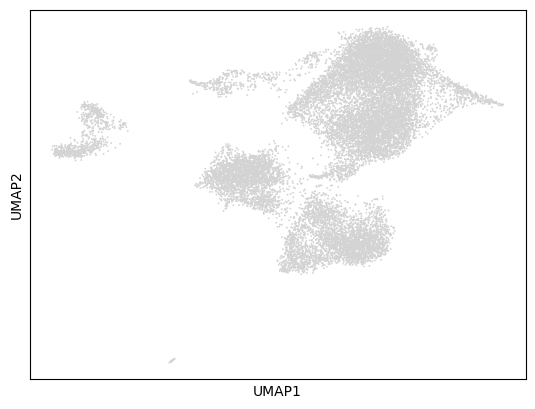

/var/folders/24/0q_bzdl54_lf_6mbt90zt8nw0000gn/T/ipykernel_96623/1995633395.py:28: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_w)


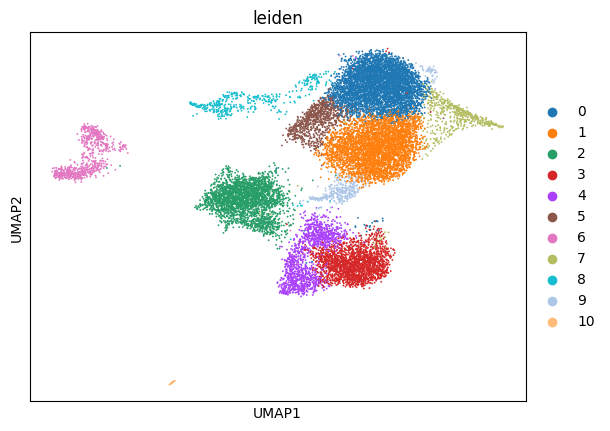

In [9]:
# 2) Compute QC metrics (mito%, total counts, n_genes)
# adata.var["mt"] = adata.var_names.str.upper().str.startswith("MT-")
# sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace=True)

# # 3) (Optional) Inspect distributions to pick thresholds
# sc.pl.violin(adata, ["total_counts", "n_genes_by_counts", "pct_counts_mt"],
#              jitter=0.4, multi_panel=True)

sc.pp.filter_cells(adata_w, min_genes=200)
# adata = adata[adata.obs.pct_counts_mt < 5, :]
# adata = adata[adata.obs.total_counts < 25000, :]
sc.pp.filter_genes(adata_w, min_cells=3)

sc.pp.normalize_total(adata_w, target_sum=1e4)
sc.pp.log1p(adata_w)
# 6) (Optional) Identify highly variable genes for downstream
sc.pp.highly_variable_genes(adata_w, n_top_genes=2000, subset=True, flavor="seurat")

# 7) (Optional) Scale and regress out unwanted effects
# sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata_w, max_value=10)


sc.pp.pca(adata_w)
sc.pp.neighbors(adata_w)
sc.tl.umap(adata_w)
sc.pl.umap(adata_w)
sc.tl.leiden(adata_w)
sc.pl.umap(adata_w, color=['leiden'])

In [10]:
import warnings
import numpy as np
import pandas as pd

def sctype_score(
    scRNAseqData: pd.DataFrame,
    scaled: bool = True,
    gs: dict[str, list[str]] = None,
    gs2: dict[str, list[str]] = None,
    gene_names_to_uppercase: bool = True,
) -> pd.DataFrame:
    """
    Score each cell for each signature in `gs` (positive markers) minus `gs2` (negative markers),
    weighting each gene by its 'marker sensitivity' (frequency across GS lists).
    """
    # 0) Basic sanity checks
    if not isinstance(scRNAseqData, pd.DataFrame):
        warnings.warn("scRNAseqData should be a pandas DataFrame")
    elif scRNAseqData.size == 0:
        warnings.warn("scRNAseqData has zero entries")

    if gs is None:
        raise ValueError("`gs` (positive gene sets) must be provided")
    if gs2 is None:
        gs2 = {ct: [] for ct in gs}

    # 1) Compute marker sensitivity from the union of all positive gene sets
    all_pos = [g for sub in gs.values() for g in sub]
    freq = pd.Series(all_pos).value_counts()  # gene -> count
    nsets = len(gs)
    # rescale counts so that count=1→0 and count=nsets→1
    sensitivity = (freq - 1) / (nsets - 1)
    marker_sens_df = pd.DataFrame({
        "gene_": freq.index,
        "score_marker_sensitivity": sensitivity.values
    })

    # 2) Optionally uppercase your gene names
    mat = scRNAseqData.copy()
    if gene_names_to_uppercase:
        mat.index = mat.index.str.upper()

    # 3) Filter each gs/gs2 list to genes actually in your data
    gs_filt  = {ct: [g for g in genes if g in mat.index] for ct, genes in gs.items()}
    gs2_filt = {ct: [g for g in genes if g in mat.index] for ct, genes in gs2.items()}

    # 4) Keep only sensitivities for the genes in your positive sets
    valid_genes = set(g for genes in gs_filt.values() for g in genes)
    marker_sens_df = marker_sens_df[marker_sens_df["gene_"].isin(valid_genes)]

    # 5) Build Z: either the raw data or row‐wise z‐scored
    if not scaled:
        # z‐score each row (gene)
        mu  = mat.mean(axis=1)
        sd  = mat.std(axis=1).replace(0, np.nan)
        Z = mat.sub(mu, axis=0).div(sd, axis=0).fillna(0)
    else:
        Z = mat

    # 6) Multiply each gene’s row by its sensitivity weight
    sens_map = marker_sens_df.set_index("gene_")["score_marker_sensitivity"]
    for gene, weight in sens_map.items():
        Z.loc[gene] = Z.loc[gene] * weight

    # 7) Subselect only the genes that appear in any positive or negative set
    all_markers = set(g for genes in gs_filt.values() for g in genes) | \
                  set(g for genes in gs2_filt.values() for g in genes)
    Z = Z.loc[list(all_markers)]

    # 8) Compute the signature score for each cell‐type × cell:
    #    sum(pos_genes)/sqrt(len(pos_genes))  –  sum(neg_genes)/sqrt(len(neg_genes))
    cells = Z.columns
    scores = {}
    for ct in gs_filt:
        pos = gs_filt[ct]
        neg = gs2_filt.get(ct, [])
        # sum up, normalize
        pos_sum = Z.loc[pos].sum(axis=0) / np.sqrt(len(pos)) if pos else pd.Series(0, index=cells)
        neg_sum = Z.loc[neg].sum(axis=0) / np.sqrt(len(neg)) if neg else pd.Series(0, index=cells)
        scores[ct] = pos_sum - neg_sum  # note minus for negative markers

    # 9) Build the result DataFrame (cell‐types × cells) and drop any all‐zero rows
    es = pd.DataFrame(scores).T  # index=cell‐type, columns=cells
    es = es.loc[~(es == 0).all(axis=1)]

    return es


In [11]:
import pandas as pd
import warnings
from mygene import MyGeneInfo

mg = MyGeneInfo()

def gene_sets_prepare(path_to_db_file: str, cell_type: str, species: str = "rat"):
    """
    Read an Excel of marker genes, filter by tissueType == cell_type,
    clean and correct gene symbols (up and down lists), and return two dicts:
      - gs_positive: {cellName: [corrected up‐genes]}
      - gs_negative: {cellName: [corrected down‐genes]}
    """
    # 1) load & filter
    df = pd.read_excel(path_to_db_file)
    df = df[df["tissueType"] == cell_type].copy()
    # drop any fully‐empty rows
    df = df.dropna(subset=["geneSymbolmore1", "geneSymbolmore2"], how="all")

    # 2) strip spaces and ensure strings
    for col in ["geneSymbolmore1", "geneSymbolmore2"]:
        df[col] = df[col].fillna("").astype(str).str.replace(" ", "", regex=False)

    # helper to clean & correct one column
    def _clean_and_correct(series: pd.Series) -> pd.Series:
        out = []
        for raw in series:
            # split, uppercase, remove NA/empty, sort
            genes = [g.strip().upper() for g in raw.split(",") if g and g.upper() != "NA"]
            genes = sorted(set(genes))
            if not genes:
                out.append("")
                continue

            # query mygene for approved symbol
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                res = mg.querymany(
                    genes,
                    scopes="symbol",
                    fields="symbol",
                    species=species,
                    as_dataframe=True,
                    returnall=False
                )

            # pull out the “symbol” column, drop any NaNs
            if isinstance(res, pd.DataFrame) and "symbol" in res.columns:
                corrected = res["symbol"].dropna().unique().tolist()
            else:
                # fallback: keep original if no correction found
                corrected = [r.get("symbol", r["query"]) for r in res if "symbol" in r]

            out.append(",".join(corrected))
        return pd.Series(out, index=series.index)

    # 3) clean & correct each marker column
    df["geneSymbolmore1"] = _clean_and_correct(df["geneSymbolmore1"])
    df["geneSymbolmore2"] = _clean_and_correct(df["geneSymbolmore2"])

    # 4) final clean‐up (replace any “///” with commas, strip spaces again)
    for col in ["geneSymbolmore1", "geneSymbolmore2"]:
        df[col] = (
            df[col]
            .str.replace("///", ",", regex=False)
            .str.replace(" ", "", regex=False)
        )

    # 5) build your gs_positive / gs_negative dicts
    gs_pos = {}
    gs_neg = {}
    for _, row in df.iterrows():
        cn = row["cellName"]
        up_genes = [g for g in row["geneSymbolmore1"].split(",") if g]
        dn_genes = [g for g in row["geneSymbolmore2"].split(",") if g]
        gs_pos[cn] = up_genes
        gs_neg[cn] = dn_genes

    return {"gs_positive": gs_pos, "gs_negative": gs_neg}

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def auto_detect_tissue_type(path_to_db_file: str,
                            adata,
                            scaled: bool,
                            assay: str = "RNA"):
    """
    Loop over all tissue types in an Excel DB, score adata against each
    signature, then rank tissues by the mean top‐gene score per Leiden cluster.
    """
    # 1) Read the database and get unique tissues
    db = pd.read_excel(path_to_db_file)
    tissues = db['tissueType'].unique()
    results = []

    # 2) Loop over each tissue
    for tissue in tissues:
        print(f"Checking… {tissue}")

        # 2a) pull out positive/negative marker sets for this tissue
        gs = gene_sets_prepare(path_to_db_file, tissue)

        # 2b) grab the raw or scaled count matrix
        if scaled:
            # assume you stored scaled data in layers['scale.data']
            expr = adata.layers.get('scale.data')
            if expr is None:
                raise ValueError("scaled=True but no 'scale.data' layer in adata")
        else:
            expr = adata.X

        # wrap into a DataFrame genes × cells
        expr_df = pd.DataFrame(
            expr.T,
            index=adata.obs_names,
            columns=adata.var_names
        ).T

        # 2c) run the cell‐type scoring
        es_max = sctype_score(
            scRNAseqData=expr_df,
            scaled=scaled,
            gs=gs['gs_positive'],
            gs2=gs['gs_negative'],
            marker_sensitivity=gs['marker_sensitivity'],
            verbose=True
        )

        # 2d) for each Leiden cluster, sum the per‐gene scores across its cells,
        #     take the top gene, and record its score
        cluster_scores = []
        clusters = adata.obs['leiden'].unique()
        for cl in clusters:
            cells_in_cl = adata.obs_names[adata.obs['leiden'] == cl]
            # sum scores across those columns (cells)
            gene_sums = es_max.loc[:, cells_in_cl].sum(axis=1)
            top_gene_score = gene_sums.max()
            cluster_scores.append(top_gene_score)

        # 2e) the tissue’s summary score is the mean of those top‐gene scores
        results.append({
            'tissue': tissue,
            'score': np.mean(cluster_scores)
        })

    # 3) assemble & sort the results
    results_df = pd.DataFrame(results).sort_values('score', ascending=False)

    # 4) plot a simple barplot
    plt.figure(figsize=(8,4))
    plt.bar(results_df['tissue'], results_df['score'],
            color=(0.8, 0.1, 0.1, 0.6))
    plt.xticks(rotation=90, ha='right')
    plt.xlabel("Tissue")
    plt.ylabel("Summary score")
    plt.title("Higher score ⇒ more likely tissue type")
    plt.tight_layout()
    plt.show()

    return results_df


In [13]:
import scanpy as sc
import pandas as pd
import numpy as np
from anndata import AnnData

def run_sctype(
    adata: AnnData,
    known_tissue_type: str | None = None,
    assay: str = "RNA",
    scaled: bool = True,
    custom_marker_file: str | None = None,
    plot: bool = False,
    name: str = "sctype_classification",
) -> AnnData:
    """
    Annotate an AnnData with scType‐derived cell‐type per cluster.
    Adds a new adata.obs[name] column and (optionally) plots UMAP.
    """
    # 1) Basic checks
    if adata is None:
        raise ValueError("Argument 'adata' is missing")
    if not isinstance(adata, AnnData):
        raise ValueError("Argument 'adata' must be an AnnData object")

    # 2) Marker DB
    if custom_marker_file is None:
        try:
            custom_marker_file = sctype_source()
        except NameError:
            raise ValueError("No custom_marker_file and sctype_source() not defined")

    # 3) Guess tissue type if needed
    if known_tissue_type is None:
        print("Guessing tissue type…")
        df_tissue = auto_detect_tissue_type(custom_marker_file, adata, scaled, assay)
        known_tissue_type = df_tissue["tissue"].iloc[0]
    tissue_type = known_tissue_type

    # 4) Prepare positive/negative gene sets
    gs_list = gene_sets_prepare(custom_marker_file, tissue_type)
    gs_pos = gs_list["gs_positive"]
    gs_neg = gs_list["gs_negative"]

    # 5) Extract expression matrix (cells × genes)
    if scaled and "scale.data" in adata.layers:
        mat = adata.layers["scale.data"]
    else:
        mat = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X

    # Build a DataFrame cells × genes, then transpose to genes × cells
    df = pd.DataFrame(
        mat,
        index=adata.obs_names,
        columns=adata.var_names
    )
    expr_df = df.T
    # 6) Compute signature scores (signature × cell)
    es_max = sctype_score(
        scRNAseqData=expr_df,
        scaled=scaled,
        gs=gs_pos,
        gs2=gs_neg
    )

    # 7) Identify which cluster column to use
    if "seurat_clusters" in adata.obs:
        cluster_col = "seurat_clusters"
    elif "leiden" in adata.obs:
        cluster_col = "leiden"
    else:
        sc.pp.neighbors(adata)
        sc.tl.leiden(adata, key_added="leiden")
        cluster_col = "leiden"

    # 8) Summarize per‐cluster top scores
    rows = []
    for cl in adata.obs[cluster_col].unique():
        cells = adata.obs_names[adata.obs[cluster_col] == cl]
        gene_sums = es_max[cells].sum(axis=1)
        top10 = gene_sums.nlargest(10)
        for gene, score in top10.items():
            rows.append({
                "cluster": cl,
                "type": gene,
                "scores": float(score),
                "ncells": len(cells),
            })
    cL_df = pd.DataFrame(rows)
    # pick the single top per cluster
    idx = cL_df.groupby("cluster")["scores"].idxmax()
    sctype_scores = cL_df.loc[idx].copy()

    # 9) Low‐confidence clusters → "Unknown"
    low_conf = sctype_scores["scores"] < (sctype_scores["ncells"] / 4)
    sctype_scores.loc[low_conf, "type"] = "Unknown"

    # 10) Write the classification into adata.obs
    adata.obs[name] = ""
    for _, row in sctype_scores.iterrows():
        mask = adata.obs[cluster_col] == row["cluster"]
        adata.obs.loc[mask, name] = row["type"]

    # 11) Optional UMAP plot
    if plot:
        sc.pl.umap(adata, color=name)

    print(f"New metadata added: {name}")
    return adata


In [14]:
import os

def sctype_source() -> str:
    """
    Return the path to the ScType database file.
    Assumes 'ScTypeDB_full.xlsx' lives in the same directory as this notebook/script.
    """
    db_fname = f"{base_path}ScTypeDB_full.xlsx"
    if not os.path.exists(db_fname):
        raise FileNotFoundError(f"Could not find database file '{db_fname}'")
    return db_fname

In [15]:
adata_w


AnnData object with n_obs × n_vars = 17383 × 2000
    obs: 'batch', 'n_genes', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [16]:
# Read the excel file
df_markers = pd.read_excel(f"{base_path}ScTypeDB_full.xlsx")
print(df_markers.dtypes)

db_path = sctype_source()
# e.g.
sets = gene_sets_prepare(db_path, "Immune system")


adata_new = run_sctype(adata_w,
    known_tissue_type="Immune system",            # or e.g. "Immune system"
    assay="RNA",
    scaled=True,
    custom_marker_file=f"{base_path}ScTypeDB_full.xlsx",#"markers.xlsx",
    plot=True,
    name="sctype_classification")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


tissueType         object
cellName           object
geneSymbolmore1    object
geneSymbolmore2    object
shortName          object
dtype: object


5 input query terms found no hit:	['C10ORF10', 'HLA-DQA1', 'HLA-DQB1', 'IGLL5', 'VPREB1']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
3 input query terms found no hit:	['HLA-DQA1', 'HLA-DQB1', 'IGLL5']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
1 input query terms found dup hits:	[('FKBP11', 2)]
5 input query terms found no hit:	['CD138', 'CD20', 'HLA-DQA1', 'HLA-DQB1', 'IGLL5']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
1 input query terms found dup hits:	[('FKBP11', 2)]
5 input query terms found no hit:	['CD138', 'CD20', 'HLA-DQA1', 'HLA-DQB1', 'IGLL5']
Input sequence provided is already in string format. No operation performed
Input sequence provided is already i

KeyError: 'cluster'